In [5]:
from sklearn.datasets.samples_generator import make_blobs
import mglearn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [2]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

In [4]:
X = np.hstack([X, X[:, 1:] ** 2])

Text(0.5,0,'Feature ** 2')

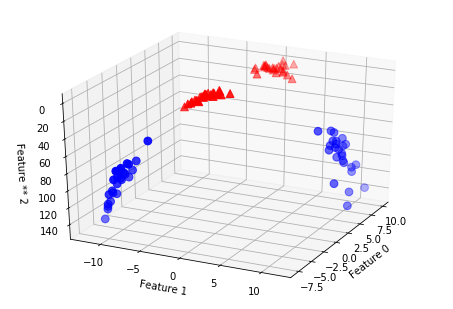

In [8]:
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X[~mask, 0], X[~mask, 1], X[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature ** 2")

In [7]:
svm = LinearSVC().fit(X, y)
coef, intercept = svm.coef_.ravel(), svm.intercept_

Text(0.5,0,'Feature ** 2')

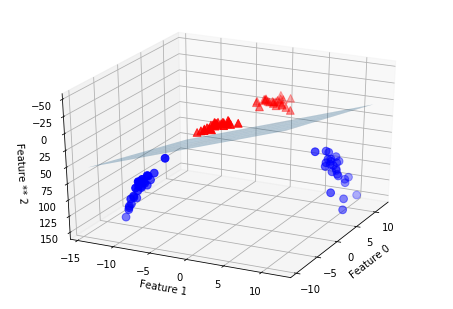

In [11]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X[:, 0].min()-2, X[:, 0].max() + 2, 50)
yy = np.linspace(X[:, 1].min()-2, X[:, 0].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X[~mask, 0], X[~mask, 1], X[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature ** 2")

Text(0.5,0,'Feature 1')

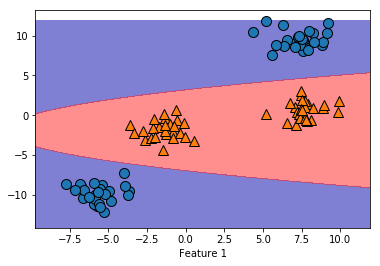

In [13]:
ZZ = YY ** 2
dec = svm.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")